#### EXPLORATORY DATA ANALYSIS ON A DATASET**
##### Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

##### Dataset:
1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.




##### Tasks:
#### 1.	Data Cleaning and Preparation:
●	Load the dataset into a DataFrame or equivalent data structure.

●	Handle missing values appropriately (e.g., imputation, deletion).

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●	Detect and treat outliers if necessary.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('Cardiotocographic.csv')

In [6]:
print("Initial Dataset Info:")
df.info()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
print("\nInitial Summary Statistics:")
print(df.describe())


Initial Summary Statistics:
                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min     

In [8]:
# Handling missing values by using median imputation
df.fillna(df.median(), inplace=True)

In [9]:
# Removing negative values in columns that should only contain non-negative values
columns_with_non_negative_values = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Tendency", "NSP"]
df[columns_with_non_negative_values] = df[columns_with_non_negative_values].clip(lower=0)

In [17]:
# Updated summary statistics after cleaning
print("\nUpdated Summary Statistics:")
print(df.describe())


Updated Summary Statistics:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003241     0.011275     0.004419     0.001939   
std      11.214379     0.004264     0.062290     0.003239     0.003215   
min      51.842487     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000007     0.000184    47.144150     1.373692    10.420514   
std       0.000117     0.000801    18.184385     1.135959    20.860775   
min     

#### 2.	Statistical Summary:
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●	Highlight any interesting findings from this summary.


In [20]:
# Central tendency and dispersion for each column
stat_summary = df.describe().T[['mean', '50%', 'std', 'min', '25%', '75%', 'max']]
stat_summary.rename(columns={'50%': 'median'}, inplace=True)
print("\nStatistical Summary for Each Variable:")
print(stat_summary)


Statistical Summary for Each Variable:
                mean      median        std        min         25%  \
LB        133.340204  133.000000  11.214379  51.842487  126.000000   
AC          0.003241    0.001634   0.004264   0.000000    0.000000   
FM          0.011275    0.000000   0.062290   0.000000    0.000000   
UC          0.004419    0.004484   0.003239   0.000000    0.001851   
DL          0.001939    0.000000   0.003215   0.000000    0.000000   
DS          0.000007    0.000000   0.000117   0.000000    0.000000   
DP          0.000184    0.000000   0.000801   0.000000    0.000000   
ASTV       47.144150   49.000000  18.184385   0.000000   32.000000   
MSTV        1.373692    1.200000   1.135959   0.000000    0.700000   
ALTV       10.420514    0.000000  20.860775   0.000000    0.000000   
MLTV        8.395796    7.400000   7.196104   0.000000    4.600000   
Width      70.804606   67.000000  41.182463   0.000000   37.000000   
Tendency    0.398501    0.000000   0.500923   0.00

#### 3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.

●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


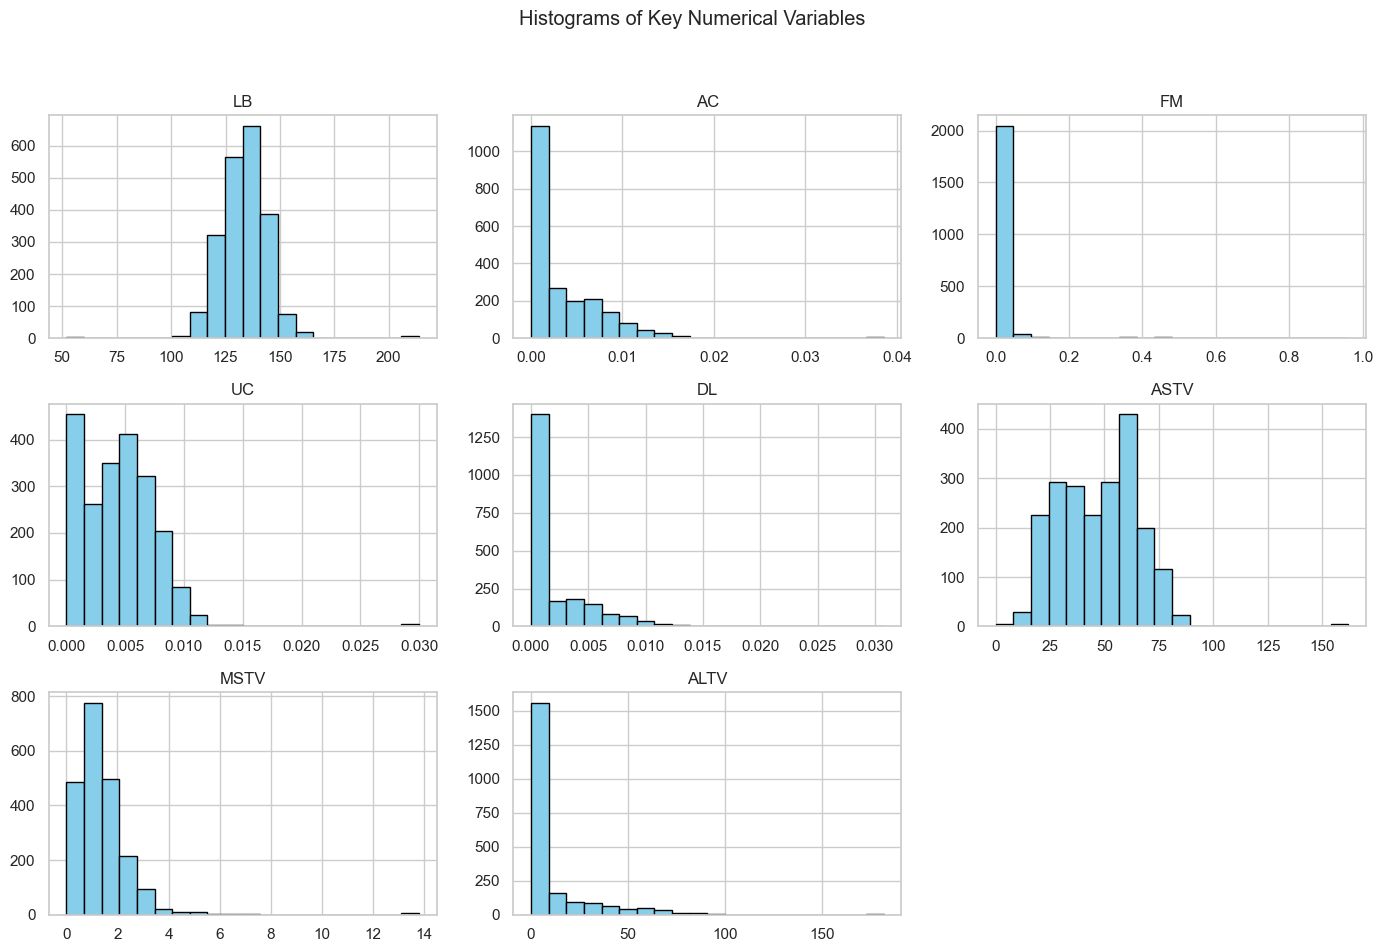

In [23]:
# Histograms for key numerical variables
df[["LB", "AC", "FM", "UC", "DL", "ASTV", "MSTV", "ALTV"]].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Key Numerical Variables")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

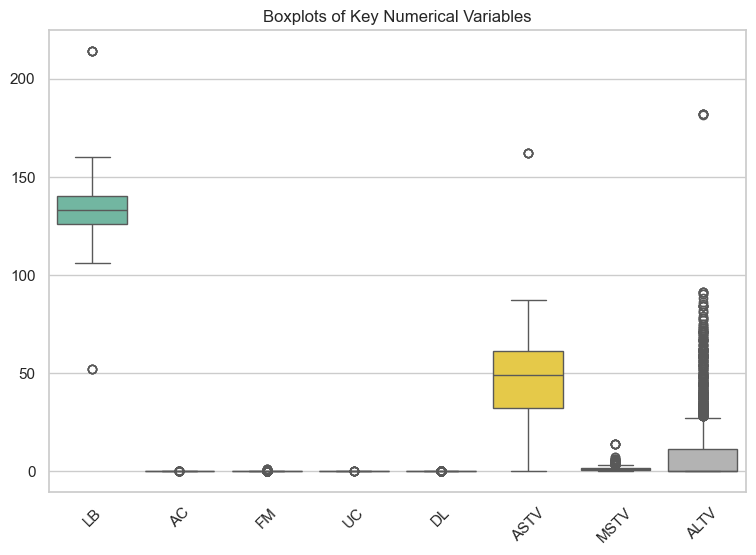

In [24]:
# Boxplots to observe distributions and outliers
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[["LB", "AC", "FM", "UC", "DL", "ASTV", "MSTV", "ALTV"]], palette="Set2")
plt.title("Boxplots of Key Numerical Variables")
plt.xticks(rotation=45)
plt.show()

C:\Users\swath\AppData\Local\Temp\ipykernel_17680\759928348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=df, palette="muted")


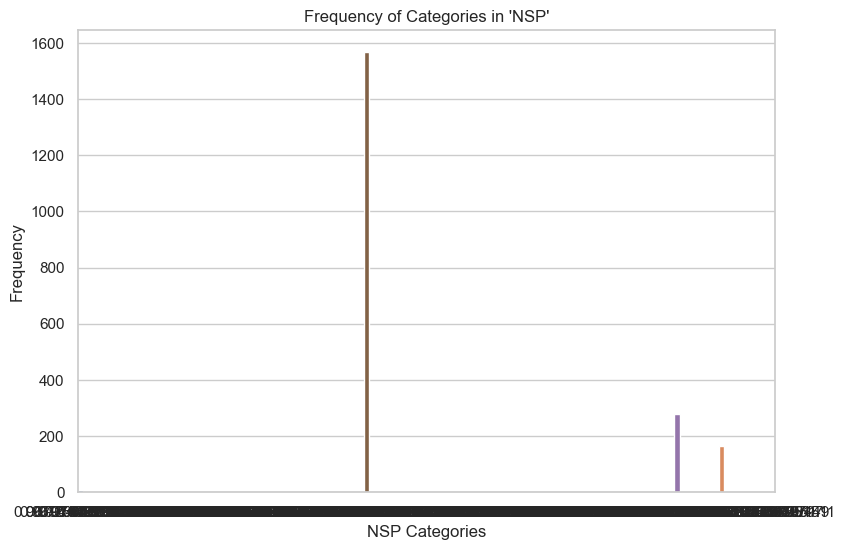

In [25]:
# Bar Chart for "NSP" (assumed categorical-like variable)
plt.figure(figsize=(9, 6))
sns.countplot(x="NSP", data=df, palette="muted")
plt.title("Frequency of Categories in 'NSP'")
plt.xlabel("NSP Categories")
plt.ylabel("Frequency")
plt.show()

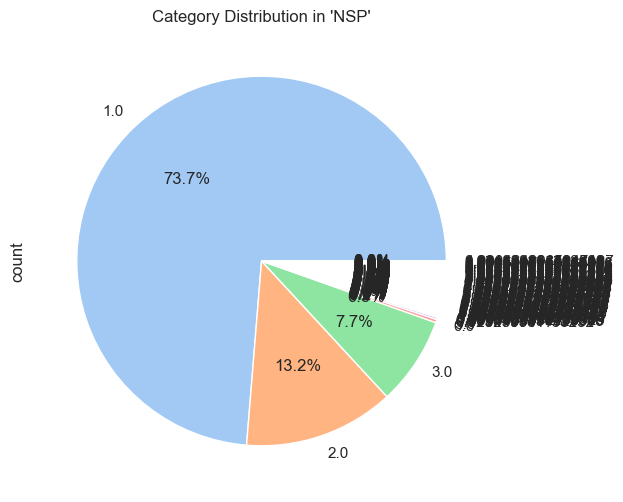

In [26]:
# Pie Chart for "NSP"
plt.figure(figsize=(8, 6))
df["NSP"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Category Distribution in 'NSP'")
#plt.ylabel("")  # Remove y-label for better aesthetics
plt.show()

C:\Users\swath\AppData\Local\Temp\ipykernel_17680\2673829758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Tendency", data=df, palette="muted")


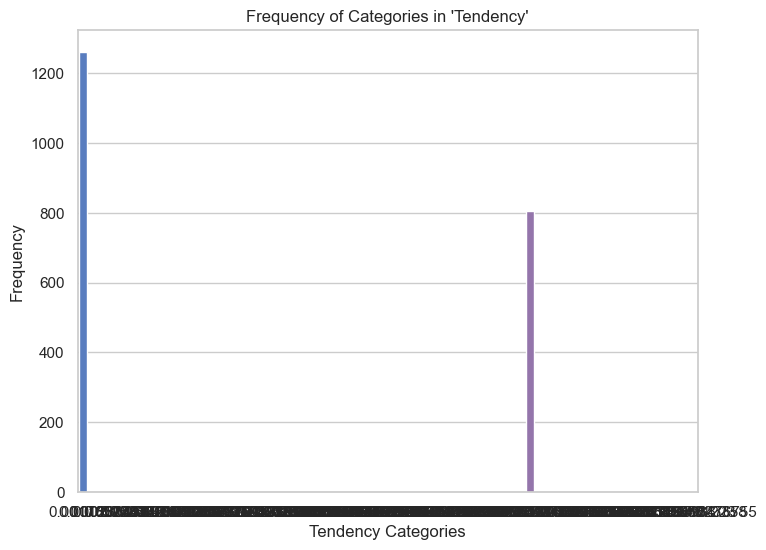

In [27]:
# Bar Chart for "Tendency" (assumed categorical-like variable)
plt.figure(figsize=(8, 6))
sns.countplot(x="Tendency", data=df, palette="muted")
plt.title("Frequency of Categories in 'Tendency'")
plt.xlabel("Tendency Categories")
plt.ylabel("Frequency")
plt.show()

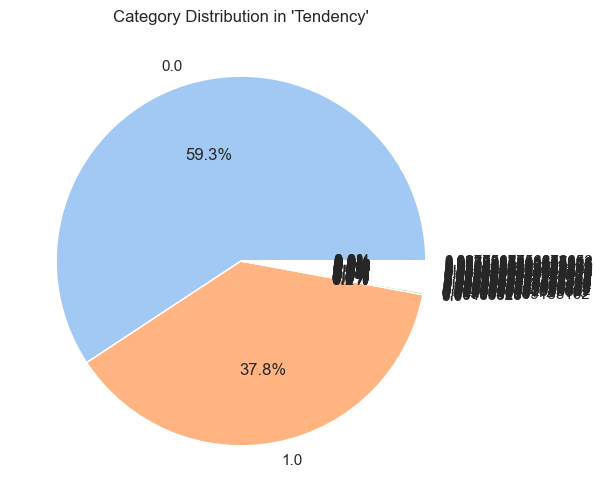

In [28]:
# Pie Chart for "Tendency"
plt.figure(figsize=(8, 6))
df["Tendency"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Category Distribution in 'Tendency'")
plt.ylabel("")  # Remove y-label for better aesthetics
plt.show()

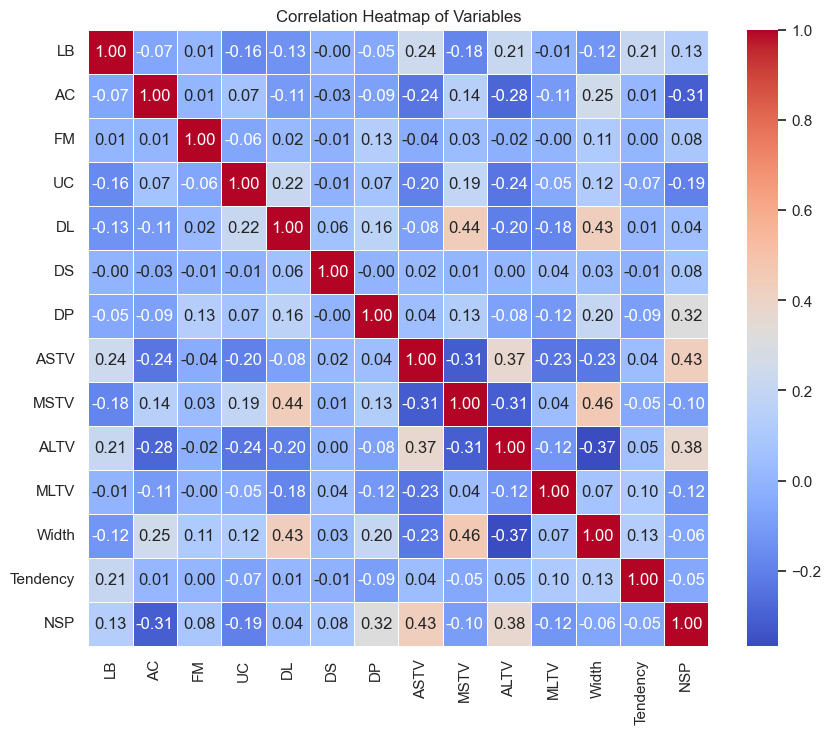

In [29]:
# Correlation heatmap to identify relationships
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Variables")
plt.show()

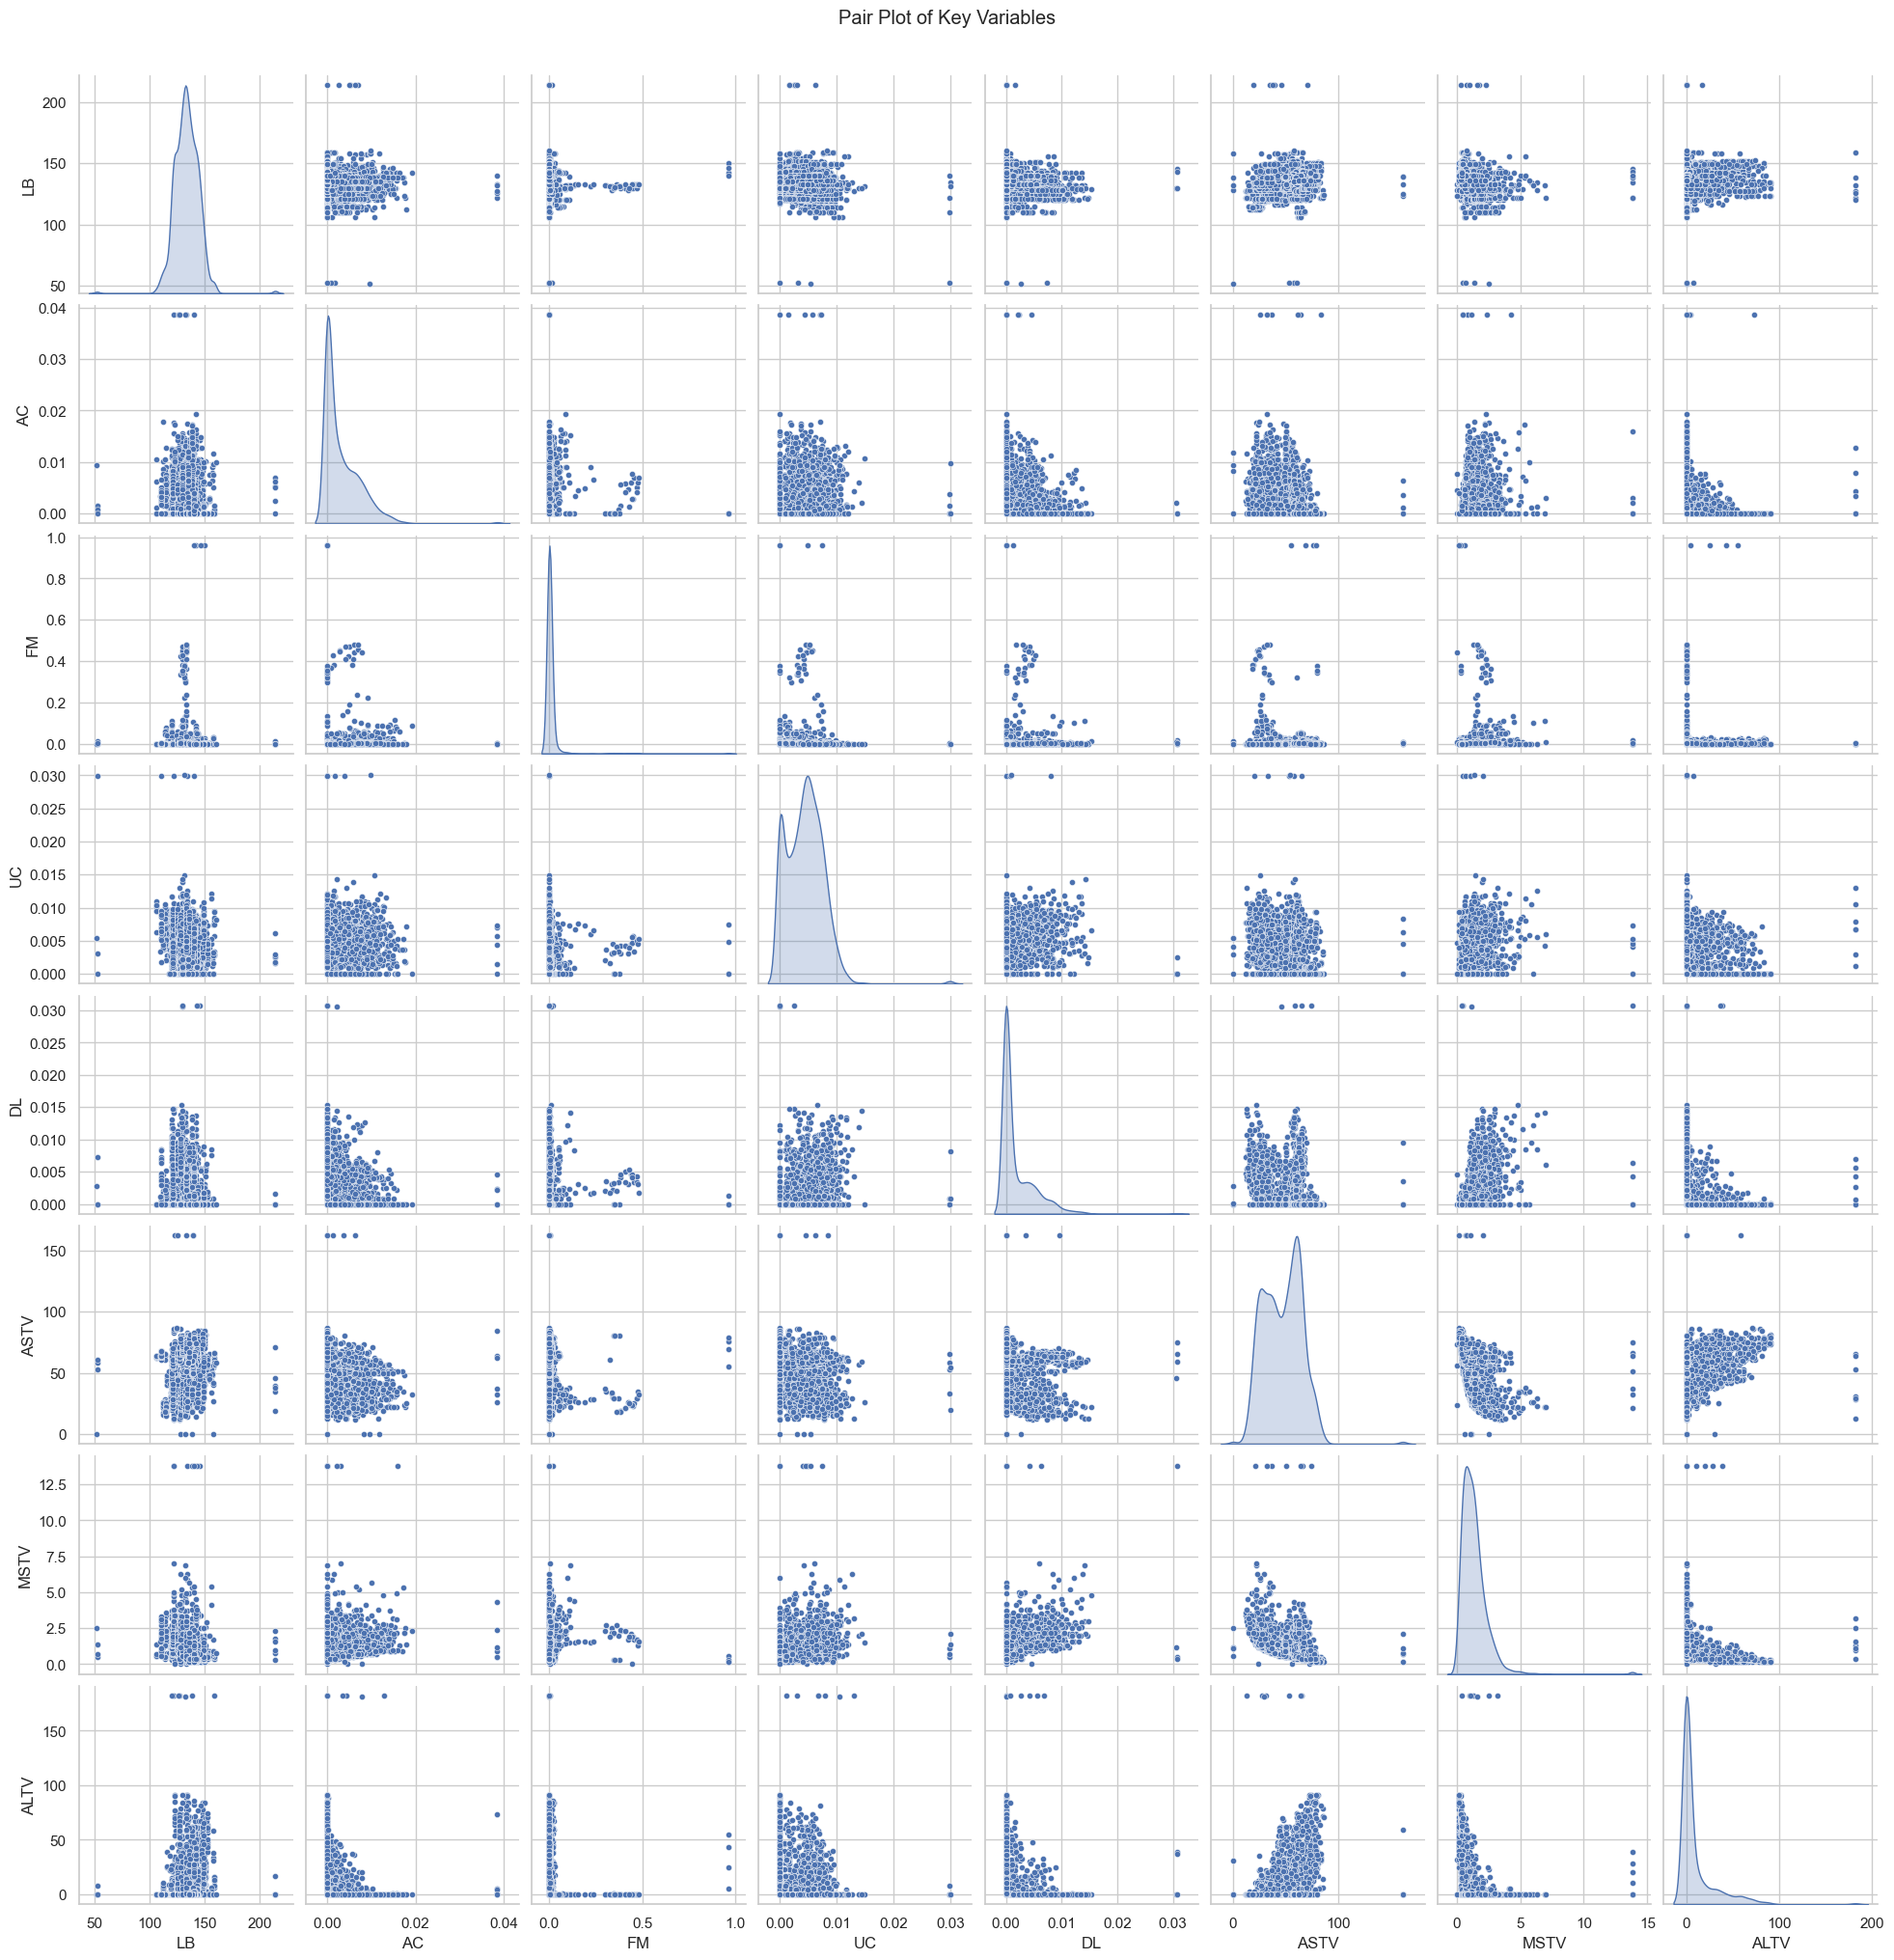

In [30]:
# Pairplot for deeper variable relationships
sns.pairplot(df[["LB", "AC", "FM", "UC", "DL", "ASTV", "MSTV", "ALTV"]], diag_kind="kde", plot_kws={"s": 20})
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()

#### 4.	Pattern Recognition and Insights:
●	Identify any correlations between variables and discuss their potential implications.

●	Look for trends or patterns over time if temporal data is available.


In [32]:
# Identify correlations and discuss potential implications
high_corr = correlation_matrix[(correlation_matrix >= 0.5) & (correlation_matrix < 1.0)]
print("\nHigh Correlations (>= 0.5) Between Variables:")
print(high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))


High Correlations (>= 0.5) Between Variables:
Empty DataFrame
Columns: []
Index: []


#### 5.	Conclusion:
●	Summarize the key insights and patterns discovered through your exploratory analysis.

●	Discuss how these findings could impact decision-making or further analyses.


Findings and observations :

1. The baseline fetal heart rate (LB) has moderate variability, with an average of around 133 bpm.
2. Abnormal variability indicators (ASTV, ALTV) show high dispersion, which might indicate varied fetal well-being states.
3. Positive correlation observed between ASTV and ALTV, suggesting that short- and long-term variabilities tend to increase together.
4. Outliers observed in variables like LB, AC, and ASTV, which could represent specific cases that require further analysis or monitoring.

Further analysis could include examining temporal trends (if timestamps were available) or applying machine learning models for predictive analysis based on these indicators.